---
> **ELGHAZI SOUFIANE**
---

<h2 style='color:olive' align='center'>Topic Modeling (TM) avec LDA, LSA et BERTopic .</h2>

<h3 style='color:orangered' align='center'>Partie I : Implémenter le modèle de topic modeling LDA sur le dataset 20newsgroups afin d'identifier les sujets (topics) présents dans les documents.</h3>

In [1]:
import sys
import pandas
sys.modules['pandas'].__version__

'1.5.3'

In [2]:
!pip install --force-reinstall --no-deps pandas==1.5.3

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


* **Importation des bibliothèques :**

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

* **Chargement du dataset 20newsgroups :Importation des bibliothèques :**

In [4]:
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [5]:
df = pd.DataFrame({'text': newsgroups_data.data})

In [6]:
for i in range (2):
    print(df["text"][i])
    print("&&"*40)



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 12

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18846 non-null  object
dtypes: object(1)
memory usage: 147.4+ KB


In [8]:
df.shape

(18846, 1)

* **Prétraitement des données :**

In [9]:
import nltk
import spacy
import re
nltk.download("wordnet") # lemmatization
nltk.download("stopwords") # stopwords
nltk.download("punkt") # tokinezation
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df = df.applymap(str.lower)

In [11]:
from nltk.corpus import stopwords
import string

english_stopwords = stopwords.words("english")
def delete_stopword(sentence):
    Test_wpunc = []
    for w in sentence.split(" "):
        if w in english_stopwords or w in string.punctuation:
            pass
        else:
            Test_wpunc.append(w)
    return " ".join(Test_wpunc)
df["text"] = df["text"].map(delete_stopword)

In [12]:
def preprocess_text(text):
    # Supprimer les retours à la ligne et les tabulations
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\t', ' ', text)
    # Supprimer les caractères spéciaux, les !, ? et les étoiles *
    text = re.sub(r'[^a-zA-Z\s!?*]', '', text)
    # Supprimer les numéros suivis de parenthèses, par exemple, "1)"
    text = re.sub(r'\b\d+\)', '', text)
    # Supprimer les séquences de trois caractères identiques ou plus
    text = re.sub(r'(.)\1\1+', r'\1', text)
    # Supprimer les occurrences de [stuff deleted]
    text = re.sub(r'\[stuff deleted\]', '', text)
    # Tokenization
    doc = nlp(text)
    # Lemmatization et suppression des stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    # Retournez le texte prétraité sous forme de chaîne
    return ' '.join(tokens)

In [13]:
# Appliquez la fonction de prétraitement à la colonne 'text' du DataFrame
df['processed_text'] = df['text'].apply(preprocess_text)

In [14]:
for i in range (2):
    print(df["processed_text"][i])
    print("&&"*40)

   sure basher pen fan pretty confused lack kind post recent pen massacre devil actually bite puzzled bit relieve go end nonpittsburgher relief bit praise pen man kill devil bad thought jagr show well regular season stat lot fo fun watch playoff bowman let jagr lot fun couple game pen go beat pulp jersey disappoint islander lose final regular season game pen rule !  
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
brother market highperformance video card support vesa local bus mb ram suggestionsidea diamond stealth pro local bus orchid farenheit ati graphic ultra pro highperformance vlb card post email thank ! matt
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


* **Transformation des données en matrice de termes-document :**

In [15]:
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])

<h4 style='color:orange'>Application de LDA</h4>

In [16]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

* **Affichage des résultats :**

##### Afficher les mots-clés associés à chaque topic

In [17]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print()

Topic #1:
['mb', 'problem', 'scsi', 'driver', 'bit', 'work', 'use', 'disk', 'card', 'drive']

Topic #2:
['problem', 'point', 'post', 'thing', 'good', 'know', 'time', 'like', 'think', 'people']

Topic #3:
['db', 'war', 'turkish', 'jews', 'israel', 'kill', 'say', 'people', 'armenian', 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax']

Topic #4:
['church', 'man', 'word', 'think', 'know', 'say', 'jesus', 'people', 'believe', 'god']

Topic #5:
['include', 'run', 'list', 'available', 'version', 'use', 'program', 'window', 'image', 'file']

Topic #6:
['center', 'information', 'space', 'april', 'research', 'report', 'national', 'year', 'university', 'new']

Topic #7:
['people', 'weapon', 'launch', 'encryption', 'chip', 'use', 'right', 'law', 'government', 'key']

Topic #8:
['season', 'hit', 'st', 'good', 'win', 'player', 'year', 'play', 'team', 'game']

Topic #9:
['say', 'work', 'good', 'look', 've', 'want', 'car', 'like', 'think', 'know']

Topic #10:
['light', 'output', 'high', 'wire', 'build', 'ground', 'e

In [18]:
# Assigner chaque document au topic dominant
df['dominant_topic_LDA'] = lda.transform(X).argmax(axis=1)

In [19]:
df[['processed_text', 'dominant_topic_LDA']].head()

,processed_text,dominant_topic_LDA
0,sure basher pen fan pretty confused lack ki...,7
1,brother market highperformance video card supp...,0
2,finally say dream mediterranean ? new area...,2
3,think ! scsi card dma transfer disk scsi...,0
4,old jasmine drive use new system understan...,0


* **Analyse des résultats :**


In [20]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

##### Créer la visualisation avec pyLDAvis

In [21]:
vectorizer.get_feature_names = vectorizer.get_feature_names_out

In [22]:
vis = pyLDAvis.sklearn.prepare(lda, X, vectorizer)
pyLDAvis.display(vis)

/opt/conda/lib/python3.10/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


##### Could Image

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


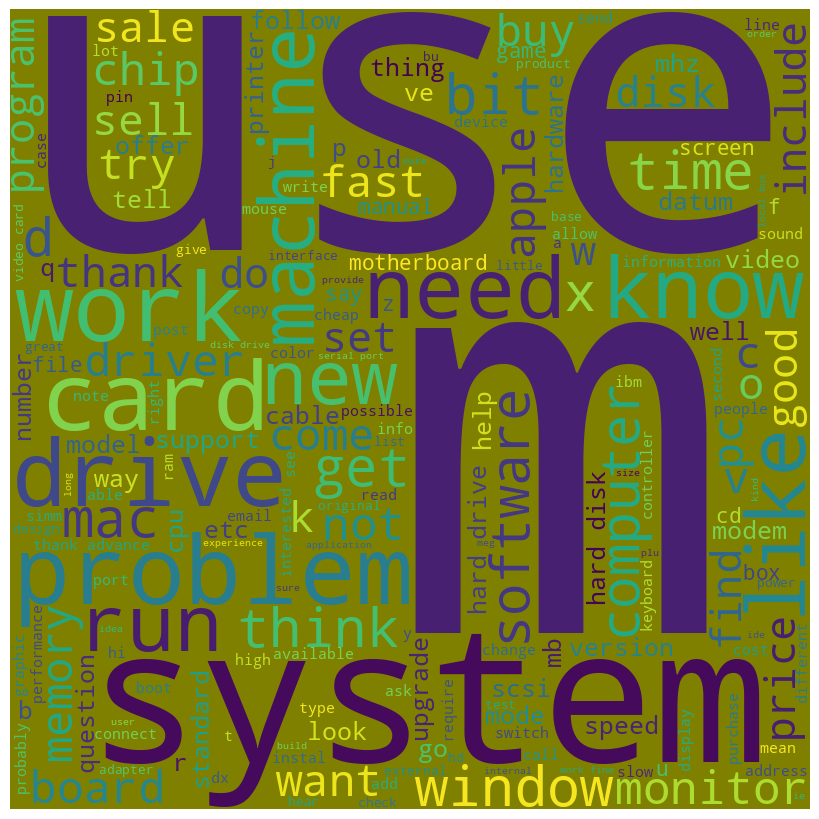

In [38]:
from wordcloud import WordCloud
text = ' '.join(df[df['dominant_topic_LDA'] == 0]['processed_text'])
wordcloud = WordCloud(width = 800, height = 800, random_state=42,background_color ='olive', stopwords ='english',min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### Afficher les documents les plus représentatifs

In [23]:
for topic_idx, topic in enumerate(lda.components_):    

    top_documents = df[df['dominant_topic_LDA'] == topic_idx]['processed_text'].head(5).tolist()
    print("Top Documents:")
    for i, doc in enumerate(top_documents, start=1):
        print(f"Document #{i}:\n{doc}\n")
    
    print("\n" + "="*50 + "\n")

Top Documents:
Document #1:
brother market highperformance video card support vesa local bus mb ram suggestionsidea diamond stealth pro local bus orchid farenheit ati graphic ultra pro highperformance vlb card post email thank ! matt

Document #2:
  think !   scsi card dma transfer disk   scsi card dma transfer contain datum scsi device attach want   important feature scsi ability detach device free scsi bus device typically multitaske os start transfer device device seek datum bus free command datum transfer device ready transfer datum aquire bus send datum   ide bus start transfer bus busy disk seek datum transfer typically ms second lock process want bus irrespective transfer time

Document #3:
  old jasmine drive use new system   understand upsate driver modern order gain compatability system   know inexpensive program ? see formatter   buit idea work ancient device tape drive utility freeze system try use drive jasmine direct tape buy   w   tape techmar mechanism essentially quest

<h3 style='color:orangered' align='center'>Partie II : Implémenter la méthode LSA sur le dataset 20newsgroups afin d'extraire les thèmes (topics) présents dans les documents.
</h3>

* **Importation des bibliothèques :**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

* **Transformation des données en matrice de termes-document :**

In [25]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['processed_text'])

<h4 style='color:orange'>Application de LSA</h4>

In [26]:
num_topics = 10 
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa.fit(X_tfidf)

TruncatedSVD(n_components=10, random_state=42)

* **Affichage des résultats :**

##### Afficher les mots-clés associés à chaque topic

In [27]:
# Afficher les mots-clés associés à chaque thème
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lsa.components_):
    print(f"Thème #{topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print()
# Assigner chaque document au thème dominant
df['dominant_topic_LSA'] = lsa.transform(X_tfidf).argmax(axis=1)

Thème #1:
['want', 'look', 'work', 'use', 'time', 'good', 'people', 'think', 'like', 'know']

Thème #2:
['run', 'driver', 'email', 'use', 'program', 'drive', 'card', 'thank', 'file', 'window']

Thème #3:
['fan', 'hockey', 'season', 'good', 'win', 'player', 'play', 'year', 'team', 'game']

Thème #4:
['mb', 'hard', 'bike', 'price', 'sell', 'buy', 'new', 'scsi', 'car', 'drive']

Thème #5:
['interested', 'hi', 'look', 'post', 'reply', 'advance', 'know', 'email', 'god', 'thank']

Thème #6:
['mb', 'problem', 'jesus', 'scsi', 'window', 'disk', 'card', 'game', 'drive', 'god']

Thème #7:
['ve', 'file', 'god', 'think', 'like', 'good', 'bike', 'look', 'window', 'car']

Thème #8:
['scsi', 'read', 'hard', 'program', 'year', 'post', 'disk', 'format', 'drive', 'file']

Thème #9:
['say', 'want', 'like', 'card', 'problem', 'drive', 'thank', 'people', 'think', 'know']

Thème #10:
['encryption', 'clipper', 'file', 'bit', 'car', 'god', 'use', 'chip', 'know', 'key']



In [28]:
df[['processed_text', 'dominant_topic_LDA','dominant_topic_LSA']].head()

,processed_text,dominant_topic_LDA,dominant_topic_LSA
0,sure basher pen fan pretty confused lack ki...,7,2
1,brother market highperformance video card supp...,0,1
2,finally say dream mediterranean ? new area...,2,0
3,think ! scsi card dma transfer disk scsi...,0,1
4,old jasmine drive use new system understan...,0,0


* **Analyse des résultats :**


##### UMAP

---
> **UMAP, qui signifie "Uniform Manifold Approximation and Projection", est un algorithme de réduction de dimensionnalité utilisé dans l'analyse de données et la visualisation de données. Il appartient à la famille des méthodes de réduction de dimensionnalité non linéaires, aux côtés d'autres techniques populaires telles que t-SNE (t-distributed stochastic neighbor embedding).**

> **L'objectif principal de UMAP est de représenter des données de haute dimension dans un espace de dimension inférieure tout en préservant les relations de proximité entre les points. En d'autres termes, UMAP permet de visualiser des données complexes de manière plus compréhensible en conservant les structures sous-jacentes.**
---

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


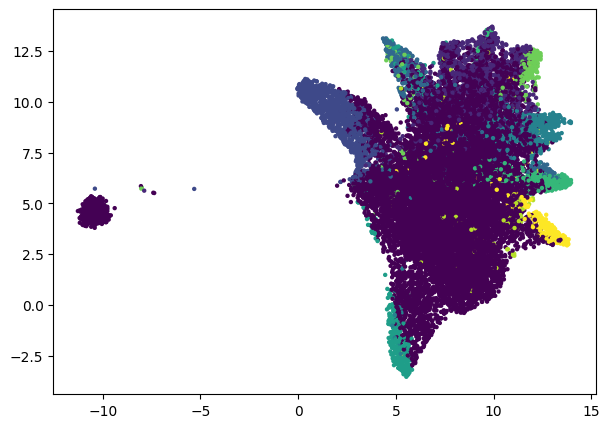

In [33]:
import umap
X_topics = lsa.fit_transform(X_tfidf)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7, 5))
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=df['dominant_topic_LSA'], 
            s=10,  # size
            edgecolor='none'
            )

plt.show()

##### Afficher le nuage de mots :

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


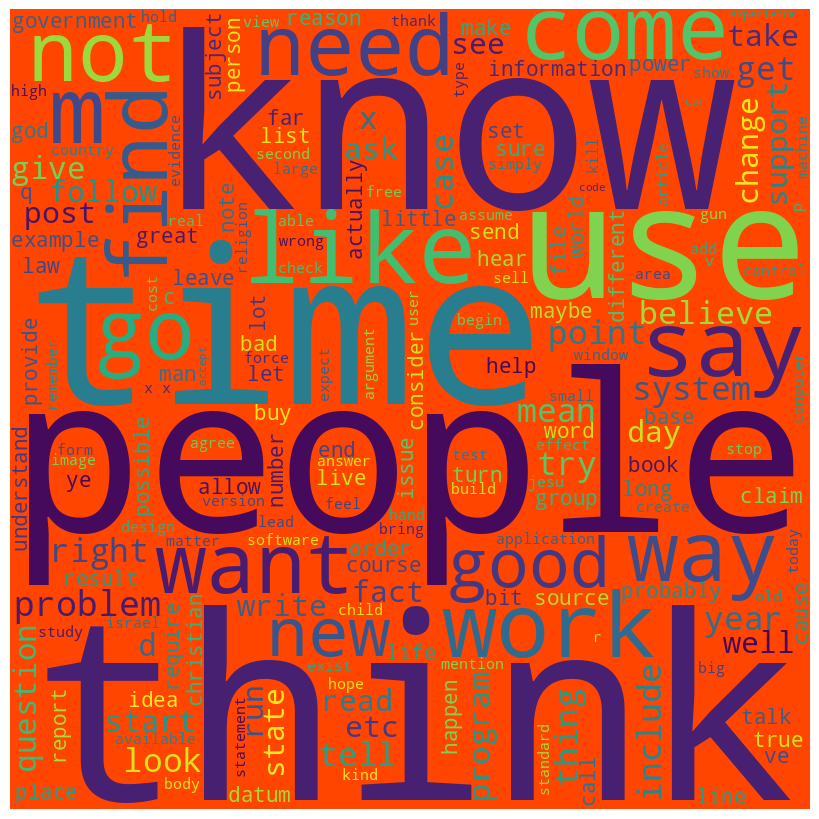

In [39]:
text = ' '.join(df[df['dominant_topic_LSA'] == 0]['processed_text'])
wordcloud = WordCloud(width = 800, height = 800, random_state=42,background_color ='orangered', stopwords ='english',min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### Afficher les documents les plus représentatifs

In [34]:
for topic_idx, topic in enumerate(lsa.components_):    

    top_documents = df[df['dominant_topic_LSA'] == topic_idx]['processed_text'].head(5).tolist()
    print("Top Documents:")
    for i, doc in enumerate(top_documents, start=1):
        print(f"Document #{i}:\n{doc}\n")
    
    print("\n" + "="*50 + "\n")

Top Documents:
Document #1:
  finally say dream mediterranean ? new   area great year like holocaust number *   ist july usa ? sweden april cold   change calendar ? * * * mention true let true shall azeri woman child go pay price *   rape kill torture armenian ? hearde call geneva convention ?   facist ! oh forgot armenian fight forget   killing raping torture kurd turk   time ! oh swedish redcross worker lie ? regional killer like person shoot s policyl   confuse ?   search turkish plane ? know talk   turkey government announce give weapon   azerbadjan armenia start attack azerbadjan self karabag province search plane weapon content announce weapon ? s confuse s ! right   weapon azeris armenian start fight azerbadjan ! shoot ? armenian bread butter ? arm personel russian army ?

Document #2:
  old jasmine drive use new system   understand upsate driver modern order gain compatability system   know inexpensive program ? see formatter   buit idea work ancient device tape drive utility f

<h3 style='color:orangered' align='center'>Partie III : Implémenter la méthode BERTopic sur le dataset 20newsgroups afin d'extraire les thèmes (topics) présents dans les documents.
</h3>

* **Installation des bibliothèques:**

In [ ]:
!pip install bertopic
!pip install umap-learn

* **Importation des bibliothèques:**

In [41]:
from bertopic import BERTopic

* **Application de BERTopic :**

In [47]:
df['dominant_topic_BERT_Topic'],_ = model.transform(df['processed_text'])

In [42]:
# Création d'un modèle BERTopic
model = BERTopic(language="english")
# Fit du modèle sur les données
topics, _ = model.fit_transform(df['processed_text'])
df['dominant_topic_BERT_Topic'],_ = model.transform(df['processed_text'])

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use th

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

* **Analyse des résultats :**

In [44]:
# Afficher les mots-clés associés à chaque thème
model.get_topic_freq().head(10)

,Topic,Count
4,-1,5407
0,0,1831
9,1,1816
5,2,1600
8,3,787
17,4,701
27,5,573
3,6,499
16,7,323
37,8,307


In [46]:
model.visualize_topics()

##### Afficher UMAP

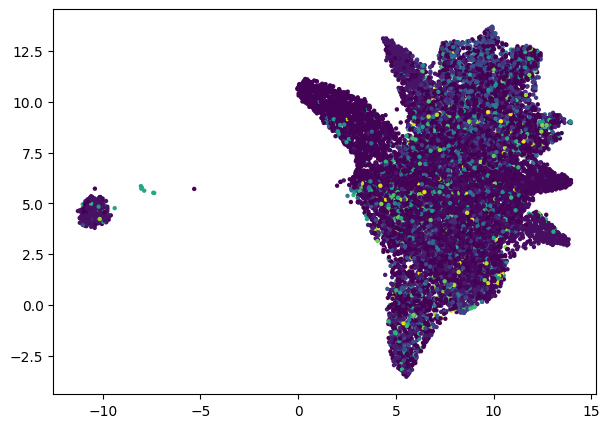

In [50]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7, 5))
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=df['dominant_topic_BERT_Topic'], 
            s=10,  # size
            edgecolor='none'
            )

plt.show()

##### Afficher Cloud Words

/opt/conda/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



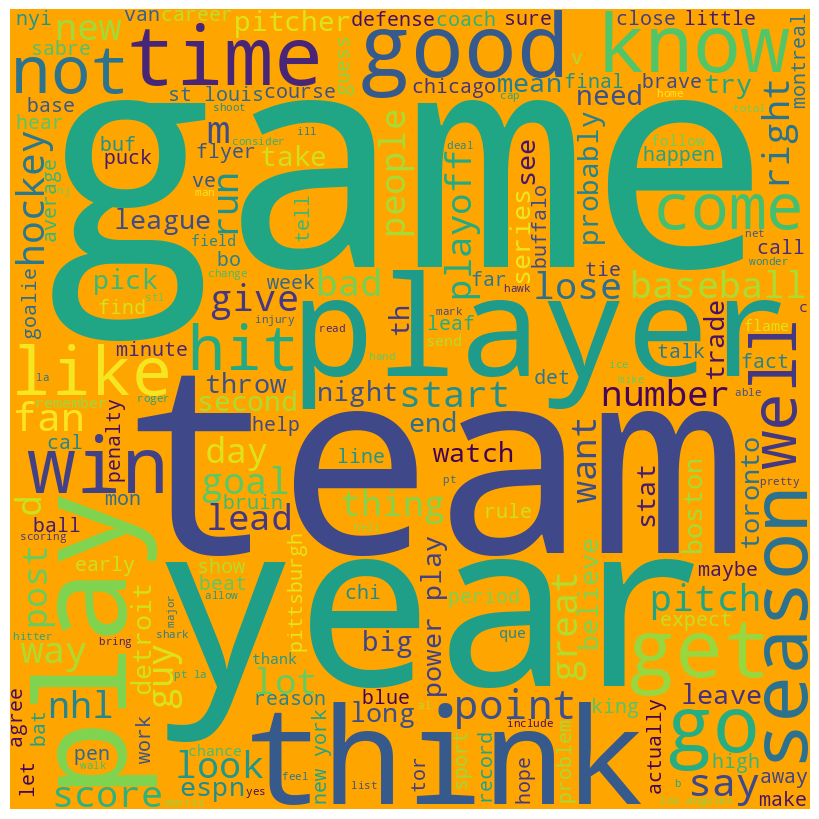

In [49]:
text = ' '.join(df[df['dominant_topic_BERT_Topic'] == 0]['processed_text'])
wordcloud = WordCloud(width = 800, height = 800, random_state=42,background_color ='orange', stopwords ='english',min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

<h2 style='color:olive' align='center'>END</h2>